In [3]:
source("./libs.R")

## data load

In [4]:
##------------------------------------------------------------
## inputs
##------------------------------------------------------------

input.chromVar.res.list <- readRDS(file = "../dat/1910_v2/output.jaspar.dev.res.Rdata")
input.chromVar.jaspar.z <- assays(input.chromVar.res.list$dev)$z
input.umap.res <- fread("../dat/1910_v2/islet.cluster_labels.filt.txt", header = T) %>% 
    rename(cluster = "cluster_name", barcodes = "index") %>% separate(cluster, into = c("cell_type_overall", 
    "subtype"), remove = F)

Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 772 rows [3, 50, 83, 84, 138, 181, 196, 213, 253, 265, 274, 301, 303, 353, 371, 388, 412, 434, 491, 495, ...].”

barcodes,UMAP1,UMAP2,cluster,cell_type_overall,subtype,unique_usable_reads,log_usable_counts,frac_duplicated_reads,frac_mito_reads,frac_promoters_used,frac_reads_in_peaks,frac_reads_in_promoters
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Islet1fresh_AGACACCTAAGAGGCAAAGGAGTAGGCTC,-5.102393,1.38682,alpha_2,alpha,2,6254,7.865955,0.7902986,0.03428042,0.04337516,0.5978574,0.2646306


[1] 15298    13

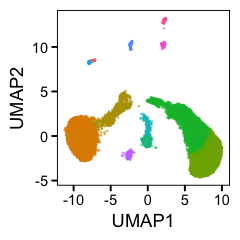

In [7]:
options(repr.plot.width = 2, repr.plot.height = 2)
# filter unkonwn
head(input.umap.res, 1)
dim(input.umap.res)
ggplot(input.umap.res, aes(UMAP1, UMAP2)) + geom_point(aes(color = cluster), 
    size = 0.1, alpha = 0.5) + theme_pubr() + theme(legend.position = "none")

In [9]:
input.chromVar.jaspar.z <- assays(input.chromVar.res.list$dev)$z

table(input.umap.res %>% filter(barcodes %in% colnames(input.chromVar.jaspar.z)[-1]) %>% 
    pull(cell_type_overall))
table(input.umap.res %>% pull(cell_type_overall))


     acinar       alpha        beta       delta      ductal endothelial 
         46        6217        7598         710          80         118 
      gamma      immune    stellate 
        260         140         128 


     acinar       alpha        beta       delta      ductal endothelial 
         46        6218        7598         710          80         118 
      gamma      immune    stellate 
        260         140         128 

In [11]:
input.chromVar.jaspar.z.agg <- melt(data.table(assays(input.chromVar.res.list$dev)$z, 
    keep.rownames = T), id = "rn", variable.name = "barcodes", value.name = "zval")
input.chromVar.jaspar.z.agg %>% head(1)

input.chromVar.jaspar.z.agg %>% nrow
input.chromVar.jaspar.z.agg <- input.chromVar.jaspar.z.agg %>% inner_join(input.umap.res) %>% 
    separate(rn, into = c("id", "name"), sep = "_")
input.chromVar.jaspar.z.agg %>% nrow

input.chromVar.jaspar.z.agg %>% head(1)
input.chromVar.jaspar.z.agg %>% select(barcodes, cell_type_overall) %>% unique %>% 
    pull(cell_type_overall) %>% table

range(input.chromVar.jaspar.z.agg$zval, na.rm = T)

rn,barcodes,zval
<chr>,<fct>,<dbl>
MA0004.1_Arnt,Islet1fresh_AGACACCTAAGAGGCAAAGGAGTAGGCTC,-1.566904


[1] 8857542

Joining, by = "barcodes"
Warning message:
“Column `barcodes` joining factor and character vector, coercing into character vector”

[1] 8857542

id,name,barcodes,zval,UMAP1,UMAP2,cluster,cell_type_overall,subtype,unique_usable_reads,log_usable_counts,frac_duplicated_reads,frac_mito_reads,frac_promoters_used,frac_reads_in_peaks,frac_reads_in_promoters
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MA0004.1,Arnt,Islet1fresh_AGACACCTAAGAGGCAAAGGAGTAGGCTC,-1.566904,-5.102393,1.38682,alpha_2,alpha,2,6254,7.865955,0.7902986,0.03428042,0.04337516,0.5978574,0.2646306


.
     acinar       alpha        beta       delta      ductal endothelial 
         46        6218        7598         710          80         118 
      gamma      immune    stellate 
        260         140         128 

[1] -20.16193  31.35658

In [8]:
ttest.res<- fread("~/Dropbox (UCSD_Epigenomics)/workReports/2019-10_islet_rev/fig1S_one_vs_one.csv") 
ttest.res%>%head(1)
dim(ttest.res)
ttest.res%>%select(motif,test)%>%unique%>%nrow

rank,motif,mean_x,mean_y,pval,test,x,y,enrichedIn,FDR,padj,diff,id,family.id,family.name,class.id,class.name,superclass.id,superclass.name
<int>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<int>,<chr>
1,MAFG,0.4259281,-2.01688,1.42e-74,alpha_vs_gamma,alpha,gamma,alpha,5.4812e-72,5.4812e-72,2.442808,MA0659.1,1.1.3,Maf-related,1.1,Basic leucine zipper factors (bZIP),1,Basic domains


[1] 790  19

[1] 772

## correlation & avg heatmap

In [25]:
require(circlize)
col_fun = colorRamp2(c(-1, 0, 1), c("green", "white", "red"))
col_fun(c(-2, -1, -0.5, 0, 0.5, 1, 2))

Loading required package: circlize
Warning message:
“package ‘circlize’ was built under R version 3.5.2”========================================
circlize version 0.4.8
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: http://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization 
  in R. Bioinformatics 2014.



[1] "#00FF00FF" "#00FF00FF" "#B1FF9AFF" "#FFFFFFFF" "#FF9E81FF" "#FF0000FF"
[7] "#FF0000FF"

[1] -0.2125108  1.0000000

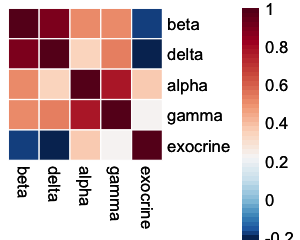

In [29]:
pd.list <- readRDS("../dat/figdata/Fig1E.Rdata")

require(pals)
options(repr.plot.width = 2.5, repr.plot.height = 2)
cor.mat <- cor(pd.list$pd)
pd <- cor.mat[c("beta", "delta", "alpha", "gamma", "exocrine"), c("beta", "delta", 
    "alpha", "gamma", "exocrine")]
range(pd)
p2 <- pheatmap(pd, scale = "none", border_color = "white", fontsize = 10, display_numbers = F, 
    cluster_rows = F, cluster_cols = F, color = colorRampPalette(rev(brewer.rdbu(11)), 
        bias = 1.5)(51))  #, legend_breaks = c(-0.2, 1)
# pdf('~/Dropbox
# (UCSD_Epigenomics)/workReports/2019-09_islet_rev/Fig.1.motif.cor.pdf', fonts =
# 'Arial', width = 2.5, height = 2, family = 'Arial')
print(p2)
# dev.off()

[1] -0.8119626  1.0000000

pdf 
  2

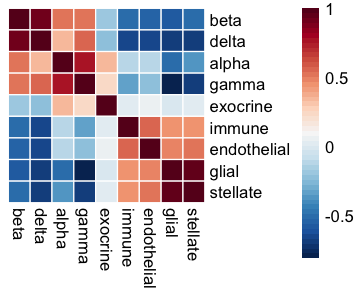

In [30]:
options(repr.plot.width = 3, repr.plot.height = 2.5)
range(cor.mat)
p2 <- pheatmap(cor.mat[rev(rownames(cor.mat)), rev(rownames(cor.mat))], scale = "none", 
    border_color = "white", fontsize = 10, display_numbers = F, cluster_rows = F, 
    cluster_cols = F, color = colorRampPalette(rev(brewer.rdbu(11)))(51))

pdf("~/Dropbox (UCSD_Epigenomics)/workReports/2019-10_islet_rev/Fig.1E.motif.cor.pdf", 
    fonts = "Arial", width = 3, height = 2.5, family = "Arial")
print(p2)
dev.off()

## UMAP

In [18]:
input.chromVar.jaspar.z%>%dim
input.chromVar.jaspar.z[1:2,1:3]
input.umap.res%>%head(1)

[1]   386 15298

,Islet1fresh_AGACACCTAAGAGGCAAAGGAGTAGGCTC,Islet1fresh_AGACACCTAAGAGGCAAAGGAGTAGGTTG,Islet1fresh_AGACACCTAAGAGGCAAAGGCTATATAGA
MA0025.1_NFIL3,-0.9358313,-0.8132506,-0.3279823
MA0030.1_FOXF2,0.5465610,0.9809532,-1.6927853


index,UMAP1,UMAP2,cluster_name,cell_type_overall,subtype,unique_usable_reads,log_usable_counts,frac_duplicated_reads,frac_mito_reads,frac_promoters_used,frac_reads_in_peaks,frac_reads_in_promoters
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Islet1fresh_AGACACCTAAGAGGCAAAGGAGTAGGCTC,-5.102393,1.38682,alpha_2,alpha,2,6254,7.865955,0.7902986,0.03428042,0.04337516,0.5978574,0.2646306


In [19]:
fun.plot.project.motif <- function(motif, input.chromVar.z = input.chromVar.jaspar.z, 
    umap.res = input.umap.res, rescale = F, cls, bks = c(-4, 0, 4), ...) {
    require(scales)
    
    motif.idx <- grep(motif, rownames(input.chromVar.z))
    if (length(motif.idx) == 0) {
        message(motif, " is not found!")
        return()
    }
    
    motif.z <- input.chromVar.z[motif.idx[1], ]
    if (rescale) {
        sc <- max(abs(quantile(motif.z, probs = c(0.05, 0.95))))
        motif.z[motif.z > sc] <- sc
        motif.z[motif.z < -sc] <- -sc
    }
    
    motif.z <- motif.z %>% as.data.frame() %>% rownames_to_column("index")
    colnames(motif.z)[2] <- "zval"
    
    tmp <- umap.res %>% right_join(motif.z)
    tmp <- tmp %>% mutate(zval = ifelse(zval > bks[3], bks[3], ifelse(zval < bks[1], 
        bks[1], zval)))
    p.default.cluster.motif <- ggplot(tmp, aes(UMAP1, UMAP2)) + geom_point(aes(colour = zval), 
        shape = 16, ...) + ggtitle(rownames(input.chromVar.jaspar.z)[motif.idx]) + 
        scale_color_gradientn(colours = cls, breaks = bks) + theme_pubr() + theme(text = element_blank(), 
        axis.ticks = element_blank(), legend.position = c(0.2, 0.9), legend.direction = "horizontal", 
        legend.key.width = unit(2, "mm"), legend.key.height = unit(0.1, "inches"), 
        legend.text = element_text(size = 10, family = "Arial"), legend.background = element_rect(fill = "transparent", 
            colour = "transparent"), plot.margin = unit(c(1, 1, -1, -1), "mm"))
    
    p.default.cluster.motif
}

Joining, by = "index"
Joining, by = "index"


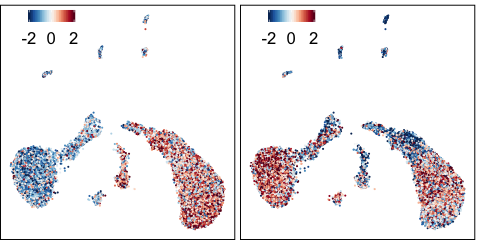

In [20]:
options(repr.plot.width = 4, repr.plot.height = 2)

ps <- lapply(c("PDX1", "FOXA1"), fun.plot.project.motif, bks = c(-2, 0, 
    2),size=.25,cls=rev(brewer.pal(n = 11, "RdBu")))
names(ps) <- c("PDX1", "FOXA1")
ggarrange(plotlist = ps, ncol = 2)

## Violin

In [21]:
plotViolin2 <- function(motifs, test_celltypes = celltype.test) {
    pd <- input.chromVar.jaspar.z.agg %>% filter(name %in% motifs, cell_type_overall %in% 
        test_celltypes)
    pd$cell_type_overall <- factor(pd$cell_type_overall, levels = test_celltypes)
    pd$name <- factor(pd$name, levels = motifs)
    ggviolin(pd, x = "cell_type_overall", remove = T, width = 1, y = "zval", size = 0.5, 
        shape = 16, fill = "cell_type_overall", ylab = "Motif enrichment") + theme_pubr() + 
        theme(legend.position = "none", panel.grid.major.y = element_line(linetype = 2, 
            size = 0.25), axis.text.x = element_text(angle = 45, hjust = 1), axis.title.x = element_blank()) + 
        scale_fill_manual(values = cols.celltype)
    
}


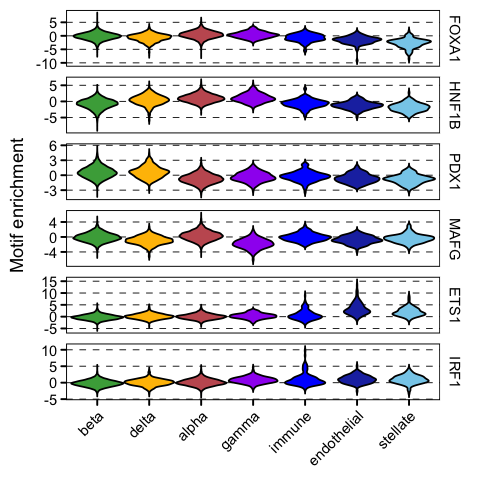

In [22]:
options(repr.plot.width = 4, repr.plot.height = 4)

plotViolin2(c("FOXA1", "HNF1B", "PDX1", "MAFG", "ETS1", "IRF1"), c("beta", "delta", 
    "alpha", "gamma", "exocrine", "immune", "endothelial", "glial", "stellate")) + 
    facet_grid(name ~ ., scales = "free_y")
ggsave("~/Dropbox (UCSD_Epigenomics)/workReports/2019-10_islet_rev/Fig1.rev.candid/Fig.1E.sup.pdf", 
    , width = 4, height = 4, units = "in", useDingbats = F)

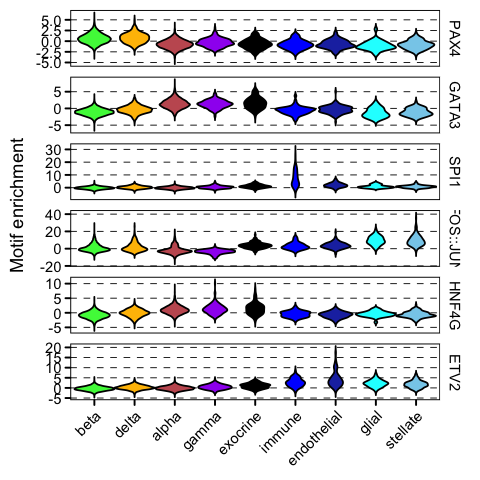

In [16]:
options(repr.plot.width = 4, repr.plot.height = 4)

plotViolin2(c("PAX4", "GATA3", "SPI1", "FOS::JUN", "HNF4G", "ETV2"), c("beta", "delta", 
    "alpha", "gamma", "exocrine", "immune", "endothelial", "glial", "stellate")) + 
    facet_grid(name ~ ., scales = "free_y")

ggsave("~/Dropbox (UCSD_Epigenomics)/workReports/2019-10_islet_rev/Fig1.rev.candid/Fig.1E.sup2.pdf", 
    , width = 4, height = 4, units = "in", useDingbats = F)

## single-cell heatmap

In [10]:
ttest.res<- fread("~/Dropbox (UCSD_Epigenomics)/workReports/2019-10_islet_rev/fig1E_one_vs_other.csv") 
ttest.res%>%head(1)
dim(ttest.res)
ttest.res%>%select(motif,test)%>%unique%>%nrow

jaspar.id,motif,mean_x,mean_y,pval,test,x,y,enrichedIn,FDR,padj,family.id,family.name,class.id,class.name,superclass.id,superclass.name
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<int>,<chr>
MA0490.1,JUNB,9.59733,-0.09048998,2.036859e-37,stellate.vs.other,stellate,other,stellate,4.624868e-36,7.862276e-35,1.1.1,Jun-related,1.1,Basic leucine zipper factors (bZIP),1,Basic domains


[1] 3555   17

[1] 3474

In [11]:
ttest.res %>% head(1)
ttest.res.2 <- ttest.res %>% select(motif, test, padj,enrichedIn) %>% unique

jaspar.id,motif,mean_x,mean_y,pval,test,x,y,enrichedIn,FDR,padj,family.id,family.name,class.id,class.name,superclass.id,superclass.name
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<int>,<chr>
MA0490.1,JUNB,9.59733,-0.09048998,2.036859e-37,stellate.vs.other,stellate,other,stellate,4.624868e-36,7.862276e-35,1.1.1,Jun-related,1.1,Basic leucine zipper factors (bZIP),1,Basic domains


sapply(ttest.res %>% arrange(test) %>% pull(test) %>% unique, function(ntest) ttest.res %>% 
    filter(test == ntest, padj < 0.001 & mean_x > 0.5 & mean_y < 0) %>% pull(motif) %>% 
    unique %>% length)
top_motifs.list <- sapply(ttest.res %>% arrange(test) %>% pull(test) %>% unique, 
    function(ntest) ttest.res %>% filter(test == ntest, padj < 0.001 & mean_x > 0.5 & 
        mean_y < 0) %>% pull(motif) %>% unique)

In [30]:
N = 10
top_motifs.list <- list()
all.cols <- c(1, 2, 6, 3)
all.test <- (ttest.res %>% arrange(test) %>% pull(test) %>% unique)[all.cols]
for (i in 1:4) {
    print(ntest <- all.test[i])
    
    if (i == 1) {
        top_motifs.list[[i]] <- (ttest.res %>% filter(!grepl("^(GATA)|(HNF)", motif)) %>% 
            filter(test == ntest, enrichedIn == sub(".vs.other", "", ntest)) %>% 
            select(motif, pval, mean_x) %>% unique %>% arrange(pval, desc(mean_x)))[1:N, 
            ] %>% pull(motif) %>% as.character
        
    } else {
        top_motifs.list[[i]] <- (ttest.res %>% filter(!grepl("^(GATA)|(HNF)", motif)) %>% 
            filter(test == ntest & enrichedIn == sub(".vs.other", "", ntest) & !(motif %in% 
                unlist(top_motifs.list))) %>% select(motif, pval, mean_x) %>% unique %>% 
            arrange(pval, desc(mean_x)))[1:N, ] %>% pull(motif) %>% as.character
        
    }
    
    
}
top_motifs.list

[1] "alpha.vs.other"
[1] "beta.vs.other"
[1] "gamma.vs.other"
[1] "delta.vs.other"


[[1]]
 [1] "RXRG"        "FOXB1"       "POU2F2"      "BHLHE23"     "BHLHE22"    
 [6] "RXRB"        "NR1H2::RXRA" "NEUROD2"     "OLIG1"       "POU5F1B"    

[[2]]
 [1] "DLX6"   "LHX2"   "EMX2"   "NOTO"   "PAX4"   "NKX6-2" "EMX1"   "GSX1"  
 [9] "PDX1"   "NKX6-1"

[[3]]
 [1] "ELF5"         "IRF1"         "CTCF"         "EHF"          "STAT1::STAT2"
 [6] "ELF3"         "IRF2"         "PRDM1"        "ELF4"         "SPIC"        

[[4]]
 [1] "MEOX1"  "VAX1"   "VAX2"   "POU6F1" "LHX6"   "SCRT1"  "RAX"    "HOXA2" 
 [9] "ESX1"   "HOXB3"

[1] "alpha.vs.other"
[1] "beta.vs.other"
[1] "gamma.vs.other"
[1] "delta.vs.other"


[[1]]
 [1] "GATA3"       "GATA2"       "GATA5"       "HNF4G"       "HNF1B"      
 [6] "HNF1A"       "GATA1::TAL1" "RXRG"        "FOXB1"       "POU2F2"     

[[2]]
 [1] "DLX6"   "LHX2"   "EMX2"   "NOTO"   "PAX4"   "NKX6-2" "EMX1"   "GSX1"  
 [9] "PDX1"   "NKX6-1"

[[3]]
 [1] "ELF5"         "IRF1"         "CTCF"         "EHF"          "STAT1::STAT2"
 [6] "ELF3"         "IRF2"         "PRDM1"        "ELF4"         "SPIC"        

[[4]]
 [1] "MEOX1"  "VAX1"   "VAX2"   "POU6F1" "LHX6"   "SCRT1"  "RAX"    "HOXA2" 
 [9] "ESX1"   "HOXB3"

[1] "GATA3"        "GATA2"        "GATA5"        "HNF4G"        "HNF1B"       
 [6] "HNF1A"        "GATA1::TAL1"  "RXRG"         "FOXB1"        "POU2F2"      
[11] "DLX6"         "LHX2"         "EMX2"         "NOTO"         "PAX4"        
[16] "NKX6-2"       "EMX1"         "GSX1"         "PDX1"         "NKX6-1"      
[21] "ELF5"         "IRF1"         "CTCF"         "EHF"          "STAT1::STAT2"
[26] "ELF3"         "IRF2"         "PRDM1"        "ELF4"         "SPIC"        
[31] "MEOX1"        "VAX1"         "VAX2"         "POU6F1"       "LHX6"        
[36] "SCRT1"        "RAX"          "HOXA2"        "ESX1"         "HOXB3"

[1] 542320      5


alpha  beta delta gamma 
 5535  7109   709   205 


Joining, by = "name"


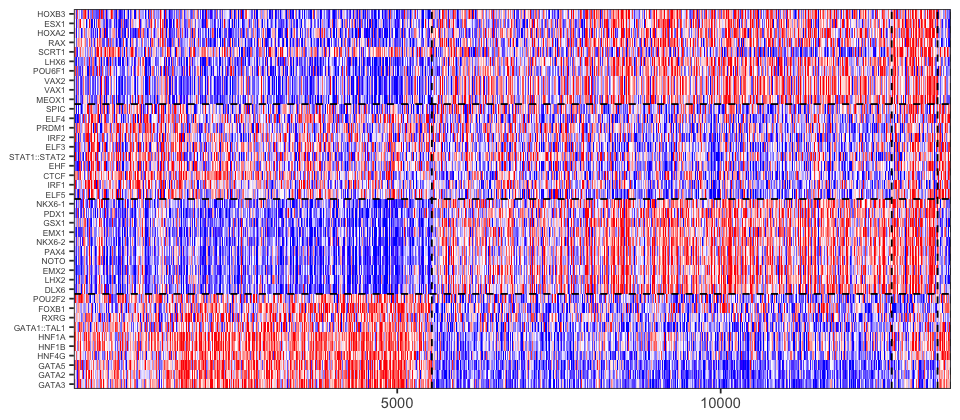

In [26]:
N = 10
top_motifs.list <- list()
all.cols <- c(1, 2, 6, 3)
all.test <- (ttest.res %>% arrange(test) %>% pull(test) %>% unique)[all.cols]
for (i in 1:4) {
    print(ntest <- all.test[i])
    
    if (i == 1) {
        top_motifs.list[[i]] <- (ttest.res %>% filter(!grepl("$GATA", motif)) %>% 
            filter(test == ntest, enrichedIn == sub(".vs.other", "", ntest)) %>% 
            select(motif, pval, mean_x) %>% unique %>% arrange(pval, desc(mean_x)))[1:N, 
            ] %>% pull(motif) %>% as.character
        
    } else {
        top_motifs.list[[i]] <- (ttest.res %>% filter(!grepl("$GATA", motif)) %>% 
            filter(test == ntest & enrichedIn == sub(".vs.other", "", ntest) & !(motif %in% 
                unlist(top_motifs.list))) %>% select(motif, pval, mean_x) %>% unique %>% 
            arrange(pval, desc(mean_x)))[1:N, ] %>% pull(motif) %>% as.character
        
    }
    
    
}
top_motifs.list

options(repr.plot.width = 8, repr.plot.height = 3.5)
names(top_motifs.list) <- all.test



(top_motifs <- do.call(c, top_motifs.list) %>% unique)
ctypes <- c("alpha", "beta", "gamma", "delta")
pd <- input.chromVar.jaspar.z.agg %>% filter(name %in% top_motifs, cell_type_overall %in% 
    ctypes) %>% select(barcodes, name, zval, cell_type_overall) %>% unique %>% mutate(motif = as.numeric(factor(name, 
    levels = top_motifs)))
dim(pd)
# pd$zval[pd$zval > max_z] <- max_z pd$zval[pd$zval < -max_z] <- -max_z

tmp <- pd %>% select(barcodes, cell_type_overall) %>% unique() %>% arrange(cell_type_overall)
# dim(tmp %>% mutate(barcodes))

pd <- pd %>% mutate(barcodes = as.numeric(factor(barcodes, levels = tmp$barcodes)))

print(seps <- table(tmp %>% unique() %>% pull(cell_type_overall)))


ncolor = 5

pd <- pd %>% left_join(pd %>% group_by(name) %>% summarise(minz = quantile(zval, 
    0.05) %>% as.numeric, maxz = quantile(zval, 0.95) %>% as.numeric)) %>% mutate(zval.scaled = ifelse(zval > 
    maxz, 1, ifelse(zval < minz, 0, (zval - minz)/(maxz - minz))))

ggplot(pd, aes(x = barcodes, y = motif)) + geom_raster(aes(fill = zval.scaled)) + 
    geom_hline(yintercept = c(N, N * 2, N * 3) + 0.5, linetype = 2, size = 0.5) + 
    geom_vline(xintercept = as.numeric(cumsum(seps)), linetype = 2, size = 0.5) + 
    scale_y_continuous(breaks = 1:length(top_motifs), labels = top_motifs) + coord_cartesian(expand = F) + 
    theme_bw() + theme(legend.position = "none", panel.grid = element_blank(), axis.title = element_blank(), 
    axis.text.y = element_text(size = 5)) + scale_fill_gradientn(colors = colorRampPalette(c("blue", 
    "white", "red"))(ncolor), breaks = seq(0, 1, length.out = ncolor))

[1] "GATA3"        "GATA2"        "GATA5"        "HNF4G"        "HNF1B"       
 [6] "HNF1A"        "GATA1::TAL1"  "RXRG"         "FOXB1"        "POU2F2"      
[11] "BHLHE23"      "BHLHE22"      "RXRB"         "NR1H2::RXRA"  "NEUROD2"     
[16] "DLX6"         "LHX2"         "EMX2"         "NOTO"         "PAX4"        
[21] "NKX6-2"       "EMX1"         "GSX1"         "PDX1"         "NKX6-1"      
[26] "LHX6"         "EVX2"         "VAX1"         "VAX2"         "LBX1"        
[31] "ELF5"         "IRF1"         "CTCF"         "EHF"          "STAT1::STAT2"
[36] "ELF3"         "IRF2"         "PRDM1"        "ELF4"         "MEOX1"       
[41] "POU6F1"       "SCRT1"        "RAX"          "HOXA2"

[1] 596552      5


alpha  beta delta gamma 
 5535  7109   709   205 


Joining, by = "name"


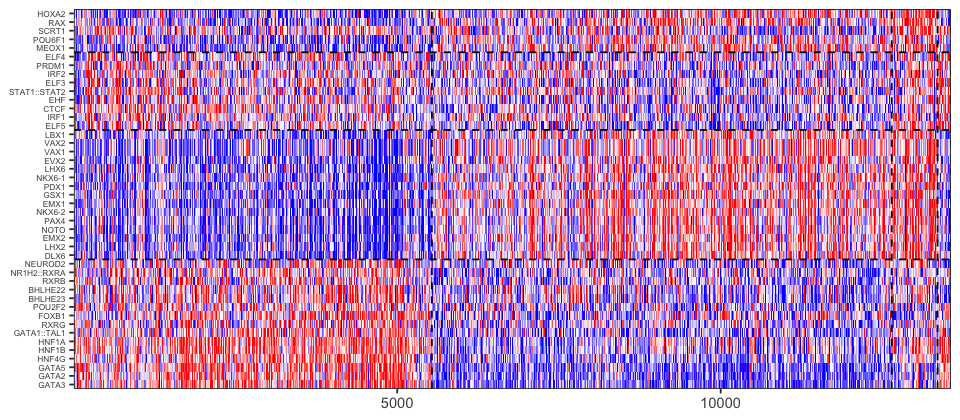

In [13]:
options(repr.plot.width = 8, repr.plot.height = 3.5)
top_motifs.list <- lapply(ttest.res %>% arrange(test) %>% pull(test) %>% unique, 
    function(ntest) (ttest.res %>% filter(test == ntest, enrichedIn == sub(".vs.other", 
        "", ntest)) %>% select(motif, pval, mean_x) %>% unique %>% arrange(pval, 
        desc(mean_x)))[1:15, ] %>% pull(motif) %>% as.character)
names(top_motifs.list) <- ttest.res %>% arrange(test) %>% pull(test) %>% unique


all.cols <- c(1, 2, 6, 3)
(top_motifs <- do.call(c, top_motifs.list[all.cols]) %>% unique)
ctypes <- c("alpha", "beta", "gamma", "delta")
pd <- input.chromVar.jaspar.z.agg %>% filter(name %in% top_motifs, cell_type_overall %in% 
    ctypes) %>% select(barcodes, name, zval, cell_type_overall) %>% unique %>% mutate(motif = as.numeric(factor(name, 
    levels = top_motifs)))
dim(pd)
# pd$zval[pd$zval > max_z] <- max_z pd$zval[pd$zval < -max_z] <- -max_z

tmp <- pd %>% select(barcodes, cell_type_overall) %>% unique() %>% arrange(cell_type_overall)
# dim(tmp %>% mutate(barcodes))

pd <- pd %>% mutate(barcodes = as.numeric(factor(barcodes, levels = tmp$barcodes)))

print(seps <- table(tmp %>% unique() %>% pull(cell_type_overall)))


ncolor = 5

pd <- pd %>% left_join(pd %>% group_by(name) %>% summarise(minz = quantile(zval, 
    0.05) %>% as.numeric, maxz = quantile(zval, 0.95) %>% as.numeric)) %>% mutate(zval.scaled = ifelse(zval > 
    maxz, 1, ifelse(zval < minz, 0, (zval - minz)/(maxz - minz))))

ggplot(pd, aes(x = barcodes, y = motif)) + geom_raster(aes(fill = zval.scaled)) + 
    geom_hline(yintercept = sapply(1:4, function(i) do.call(c, top_motifs.list[all.cols[1:i]]) %>% 
        unique %>% length) + 0.5, linetype = 2, size = 0.5) + geom_vline(xintercept = as.numeric(cumsum(seps)), 
    linetype = 2, size = 0.5) + scale_y_continuous(breaks = 1:length(top_motifs), 
    labels = top_motifs) + coord_cartesian(expand = F) + theme_bw() + theme(legend.position = "none", 
    panel.grid = element_blank(), axis.title = element_blank(), axis.text.y = element_text(size = 5)) + 
    scale_fill_gradientn(colors = colorRampPalette(c("blue", "white", "red"))(ncolor), 
        breaks = seq(0, 1, length.out = ncolor))
ggsave("~/Dropbox (UCSD_Epigenomics)/workReports/2019-10_islet_rev/Fig1.rev.candid/Fig.1E.supp.abcd.hm.pdf", 
    width = 8, height = 3.5, units = "in")

## Volcano plot

[1] "GATA3"       "GATA2"       "GATA5"       "HNF4G"       "HNF1B"      
 [6] "HNF1A"       "GATA1::TAL1" "FOXB1"       "NRL"         "RXRG"       
[11] "FOS::JUN"    "JUNB"        "FOSL1"       "FOSL2"       "JUND"       
[16] "JUN(var.2)"  "FOS"         "NFE2"        "DLX6"        "BATF::JUN"  
[21] "JDP2"        "ETV2"        "ERG"         "ETS1"        "ERF"        
[26] "ELK4"        "TEAD3"       "TEAD1"       "ELF5"        "CTCF"       
[31] "EHF"         "ELF3"        "SPI1"        "SPIC"        "ETV6"

[1] 35

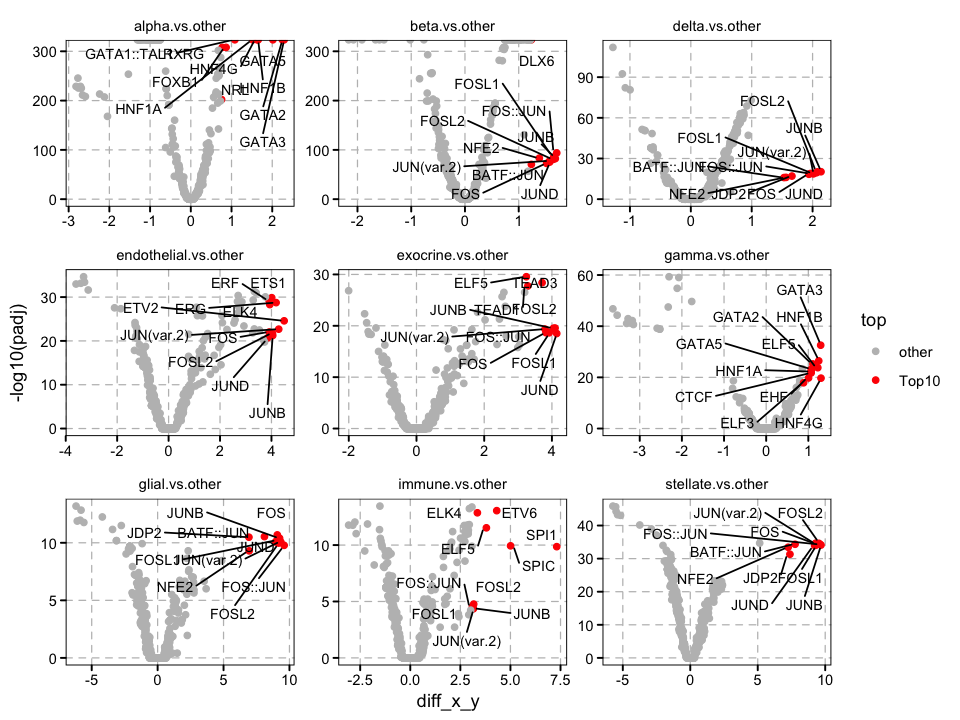

In [64]:
pd <- ttest.res %>% mutate(diff_x_y = mean_x - mean_y) %>% select(motif, diff_x_y, 
    test, pval, padj, enrichedIn) %>% unique %>% rowid_to_column("rid")
pd.marker <- pd %>% filter(diff_x_y > 0) %>% group_by(test) %>% top_n(10, wt = diff_x_y) %>% 
    top_n(-10, wt = padj) %>% arrange(test)
pd.marker %>% pull(motif) %>% unique
pd.marker %>% pull(motif) %>% unique %>% length
pd$top <- ifelse(pd$rid %in% pd.marker$rid, "Top10", "other")
options(repr.plot.width = 8, repr.plot.height = 6)
require(ggrepel)
ggplot(pd, aes(x = diff_x_y, y = -log10(padj))) + geom_point(aes(color = top)) + 
    scale_color_manual(values = c("grey", "red")) + theme_pubr() + facet_wrap(~test, 
    scales = "free") + theme(panel.grid.major = element_line(colour = "grey", linetype = 2)) + 
    geom_text_repel(data = pd.marker, aes(label = motif), size = 3, box.padding = unit(0.35, 
        "lines"), point.padding = unit(0.3, "lines"))
ggsave("~/Dropbox (UCSD_Epigenomics)/workReports/2019-10_islet_rev/Fig1.rev.candid/Fig.1s.one_vs_other.vol.top10diff.pdf", 
    width = 8, height = 6, units = "in", useDingbats = F)

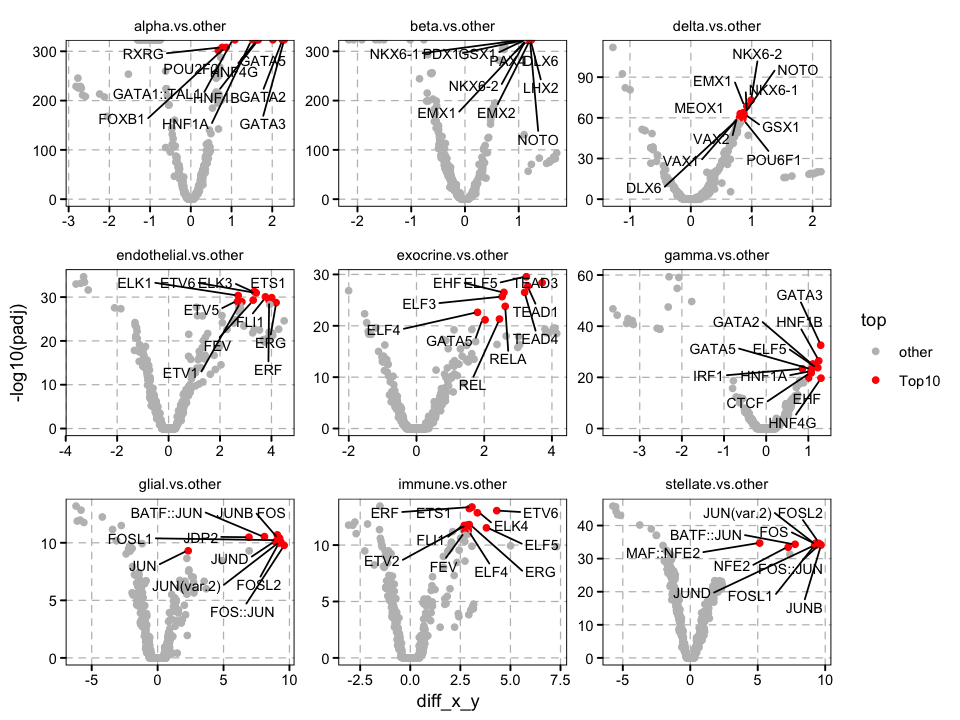

In [63]:
options(repr.plot.width = 8, repr.plot.height = 6)

pd <- ttest.res %>% mutate(diff_x_y = mean_x - mean_y) %>% select(motif, diff_x_y, 
    test, pval, padj, enrichedIn) %>% unique %>% rowid_to_column("rid")
pd.marker <- pd %>% filter(diff_x_y > 0) %>% group_by(test) %>% top_n(-10, wt = padj) %>% 
    top_n(10, wt = diff_x_y) %>% arrange(test)
pd$top <- ifelse(pd$rid %in% pd.marker$rid, "Top10", "other")
options(repr.plot.width = 8, repr.plot.height = 6)
require(ggrepel)
ggplot(pd, aes(x = diff_x_y, y = -log10(padj))) + geom_point(aes(color = top)) + 
    scale_color_manual(values = c("grey", "red")) + theme_pubr() + facet_wrap(~test, 
    scales = "free") + theme(panel.grid.major = element_line(colour = "grey", linetype = 2)) + 
    geom_text_repel(data = pd.marker, aes(label = motif), size = 3, box.padding = unit(0.35, 
        "lines"), point.padding = unit(0.3, "lines"))

ggsave("~/Dropbox (UCSD_Epigenomics)/workReports/2019-10_islet_rev/Fig1.rev.candid/Fig.1s.one_vs_other.vol.top10pval.pdf", 
    width = 8, height = 6, units = "in", useDingbats = F)